# Connection

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify

conn = mysql.connector.connect (host='localhost', password='manu1995', user= 'root', database='s401') #mi conexion sql python


cursor = conn.cursor() #el cursor es como el representante de python dentro de mysql que le permite ejecutar comandos (como un raton)

if conn.is_connected():
    print("Connection established")

# IMPORTANTE, USAR AL FINAL
# conn.close () #Aqui se acaba la conexion al mysql


Connection established


# Creación de los data frames 

In [2]:
#creacion de dataframe con panda

df_transactions= pd.read_sql_query("select * from transactions", con=conn) #pd esta llamando a la libreria panda, el read_sql_query hace que se lea la query 
#lo primero en el parentesis es la query y lo segundo es la conexion

#para cada query de sql, un nuevo data frame
df_transactions # a partir de ahora, esto es mi data frame, en la cual guardo tablas resultado de la query que ejecuté en sql con ese codigo

C:\Users\manu_\AppData\Local\Temp\ipykernel_18536\2900770164.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transactions= pd.read_sql_query("select * from transactions", con=conn) #pd esta llamando a la libreria panda, el read_sql_query hace que se lea la query


,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude
0,108B1D1D-5B23-A76C-55EF-C568E49A05DD,CcU-2938,b-2222,2021-07-07 17:43:16,293.57,0,59,275,83.7839152128,-178.860353536
1,7DC26247-20EC-53FE-E555-B6C2E55CA5D5,CcU-2945,b-2226,2022-02-04 15:52:56,312.5,0,"71, 41",275,58.9367181312,-76.8171099136
2,72997E96-DC2C-A4D7-7C24-66C302F8AE5A,CcU-2952,b-2230,2022-01-30 15:16:36,239.87,0,"97, 41, 3",275,43.3584055296,-17.6579677184
3,AB069F53-965E-A2A8-CE06-CA8C4FD92501,CcU-2959,b-2234,2021-04-15 13:37:18,60.99,0,"11, 13, 61, 29",275,1.6481916928,-158.0065729536
4,2F3B6AB6-147D-EB0B-FE8D-9A4E2EA9DBD5,CcU-2966,b-2238,2021-10-18 06:12:03,33.81,0,"47, 37, 11, 1",275,-43.4811227136,16.6025207808
...,...,...,...,...,...,...,...,...,...,...
582,C1DCC32D-E42A-F2D6-17AD-FF4A639A9B5A,CcU-3512,b-2550,2021-12-22 08:35:00,59.63,1,"71, 1, 47",267,-63.6502286336,-45.7184413696
583,5C3A8A3D-8974-40A6-A8AF-C1F7AA6B7C94,CcU-3519,b-2554,2021-07-23 15:35:14,158.05,1,"97, 31",267,15.1828036608,165.6621228032
584,D6EB93C6-5733-84C8-FDD6-57BA4136E528,CcU-3526,b-2558,2021-04-22 12:37:13,15.38,1,"5, 11",267,-50.4829856768,13.7144250368
585,A4D0D84F-4622-BB83-E6B6-51E545D4A217,CcU-3533,b-2562,2021-05-14 16:59:27,395.81,1,"7, 71, 43, 2",267,-24.640382976,-69.8769690624


In [3]:
#data frame companies

df_companies= pd.read_sql_query("select * from companies", con=conn)
df_companies

C:\Users\manu_\AppData\Local\Temp\ipykernel_18536\691946208.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_companies= pd.read_sql_query("select * from companies", con=conn)


,company_id,company_name,phone,email,country,website
0,b-2222,Ac Fermentum Incorporated,06 85 56 52 33,donec.porttitor.tellus@yahoo.net,Germany,https://instagram.com/site\r
1,b-2226,Magna A Neque Industries,04 14 44 64 62,risus.donec.nibh@icloud.org,Australia,https://whatsapp.com/group/9\r
2,b-2230,Fusce Corp.,08 14 97 58 85,risus@protonmail.edu,United States,https://pinterest.com/sub/cars\r
3,b-2234,Convallis In Incorporated,06 66 57 29 50,mauris.ut@aol.couk,Germany,https://cnn.com/user/110\r
4,b-2238,Ante Iaculis Nec Foundation,08 23 04 99 53,sed.dictum.proin@outlook.ca,New Zealand,https://netflix.com/settings\r
...,...,...,...,...,...,...
95,b-2602,Placerat LLP,05 43 67 24 41,tellus.suspendisse@hotmail.org,Netherlands,https://zoom.us/sub\r
96,b-2606,Sed Est Corp.,04 58 02 37 91,tempor.bibendum@google.couk,Canada,https://instagram.com/sub/cars\r
97,b-2610,Egestas Nunc Sed Limited,06 01 02 70 47,vitae@hotmail.edu,Italy,https://walmart.com/one\r
98,b-2614,Rutrum Non Inc.,02 66 31 61 09,neque@protonmail.net,Germany,https://netflix.com/site\r


In [4]:
df_transactions.info() #INFO DE LA DATA BASE

#Dtype ES EL TIPO DE DATO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           587 non-null    object
 1   card_id      587 non-null    object
 2   business_id  587 non-null    object
 3   timestamp    587 non-null    object
 4   amount       587 non-null    object
 5   declined     587 non-null    object
 6   product_ids  587 non-null    object
 7   user_id      587 non-null    object
 8   lat          587 non-null    object
 9   longitude    587 non-null    object
dtypes: object(10)
memory usage: 46.0+ KB


In [5]:
# Asegúrate de que la columna 'amount' esté en formato numérico
df_transactions['amount'] = pd.to_numeric(df_transactions['amount'], errors='coerce') #ESTO HACE QUE LOS DATOS QUE NO SON CONVERTIBLES A NUMERO se pongan con NaN, q es NULL

In [6]:
df_transactions.isnull().sum() #esto te cuenta los NULL en cada variable

id             0
card_id        0
business_id    0
timestamp      0
amount         0
declined       0
product_ids    0
user_id        0
lat            0
longitude      0
dtype: int64

## Exercici 1, una variable numerica

<Axes: xlabel='amount', ylabel='Count'>

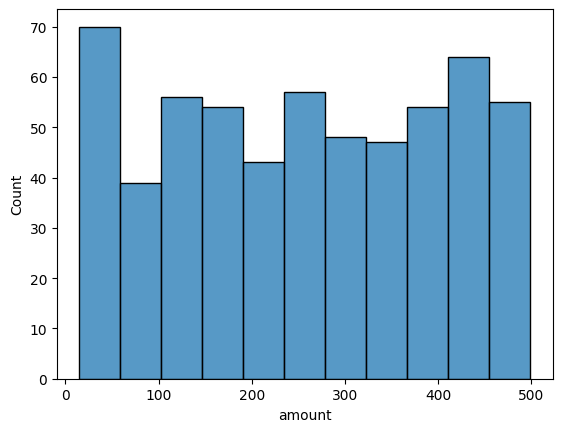

In [7]:
 #seaborn para hacer histograma, una variable numerica

sns.histplot(data=df_transactions, x='amount') #esto agrupa los amounts por rango de valor por defecto, eso es lo que hace la fucnion histograma

INTERPRETACION:

Este grafico nos muestra el numero total de "amounts" en cada rango de valores. Po ejemplo, hay una cantidad de 70 amounts en el rango de 0 a 50 (primera columna mostrada)..

Vemos como la cantidad gastada de media sige una distribucion ligeramente al alza una vez superamos el primer rango 0-50. Esto quiere decir que los gastos medios son generalmente altos y bien mantenidos a lo largo de los rangos.

## Exercici 2 dos variables numericas

In [8]:
#creacion de columna contador de product ids

from collections import Counter 

def contador_product(product_ids): #funcion para contar product ids
   
    contador = Counter(product_ids)

    numero_productos = contador[','] + 1

    return numero_productos

In [9]:
# Aplica la función contador_product de python a la columna 'product_ids'de mysql
df_transactions['product_count'] = df_transactions['product_ids'].apply(contador_product)

# Ver los 5 primeros resultados con head
df_transactions.head()

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,product_count
0,108B1D1D-5B23-A76C-55EF-C568E49A05DD,CcU-2938,b-2222,2021-07-07 17:43:16,293.57,0,59,275,83.7839152128,-178.860353536,1
1,7DC26247-20EC-53FE-E555-B6C2E55CA5D5,CcU-2945,b-2226,2022-02-04 15:52:56,312.50,0,"71, 41",275,58.9367181312,-76.8171099136,2
2,72997E96-DC2C-A4D7-7C24-66C302F8AE5A,CcU-2952,b-2230,2022-01-30 15:16:36,239.87,0,"97, 41, 3",275,43.3584055296,-17.6579677184,3
3,AB069F53-965E-A2A8-CE06-CA8C4FD92501,CcU-2959,b-2234,2021-04-15 13:37:18,60.99,0,"11, 13, 61, 29",275,1.6481916928,-158.0065729536,4
4,2F3B6AB6-147D-EB0B-FE8D-9A4E2EA9DBD5,CcU-2966,b-2238,2021-10-18 06:12:03,33.81,0,"47, 37, 11, 1",275,-43.4811227136,16.6025207808,4


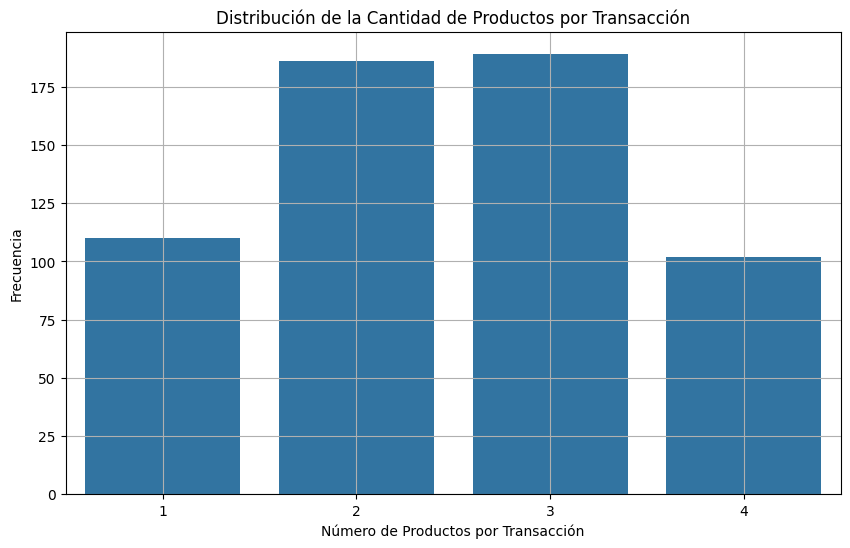

In [10]:
# Configurar la visualización con Seaborn
plt.figure(figsize=(10, 6))

# Crear un countplot para visualizar la distribución de product_count
sns.countplot(data=df_transactions, x='product_count') #bueno para variables categoricas o discretas ya que las clasifica por valores 
plt.xlabel('Número de Productos por Transacción')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Cantidad de Productos por Transacción')
plt.grid(True)

# Mostrar la gráfica
plt.show() 

INTERPRETACION:

Podemos ver como la gran mayoria de transacciones contienen de 2 a 3 productos, con un maximo de cuatro y un minimo de 1. El valor mas comun es el de tres porductos por transaccion. Los esfuerzos por parte de las compañias que comprenden nuestra base de datos deberían de apuntar en dos direcciones:

- Una, en aumentar el número maximo de prodcutos por transaccion, ya que llevará a mayores ventas (ej. fomentar tácticas de upselling)
- Aunque 3 productos por transaccion es un buen escenario, apuntar a conseguir la mayor frecuencia de número de productos por transacción, por ejemplo, de 3 a 4.

In [11]:
# Consulta SQL para obtener los datos de transacciones
query = "SELECT business_id, COUNT(*) AS num_transactions FROM transactions GROUP BY business_id"
df_business_id = pd.read_sql(query, conn)

# Filtrar empresas con al menos una transacción
df_filtered = df_business_id[df_business_id['num_transactions'] > 1]
df_filtered

C:\Users\manu_\AppData\Local\Temp\ipykernel_18536\1909256374.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_business_id = pd.read_sql(query, conn)


,business_id,num_transactions
0,b-2222,2
1,b-2226,2
2,b-2230,2
3,b-2234,2
4,b-2238,2
...,...,...
83,b-2554,2
84,b-2558,2
85,b-2562,2
86,b-2566,2


# Exercici 3, una variable categórica.

In [12]:
# Agrupar por la variable 'business_id' y contar las ocurrencias
df_business_count = df_transactions['business_id'].value_counts().reset_index()
df_business_count.columns = ['business_id', 'count']

# Filtrar para incluir solo las empresas con al menos 20 transacciones
df_business_count = df_business_count[df_business_count['count'] > 20]
df_business_count


,business_id,count
0,b-2302,105
1,b-2346,59
2,b-2326,57
3,b-2278,56
4,b-2362,54
5,b-2494,52
6,b-2618,30


In [13]:
df_companies.columns

Index(['company_id', 'company_name', 'phone', 'email', 'country', 'website'], dtype='object')

In [14]:
#data frame company name
df_company_name = df_companies['company_name'].value_counts().reset_index()
df_company_name

,company_name,count
0,Ac Fermentum Incorporated,1
1,Magna A Neque Industries,1
2,Fusce Corp.,1
3,Convallis In Incorporated,1
4,Ante Iaculis Nec Foundation,1
...,...,...
95,Placerat LLP,1
96,Sed Est Corp.,1
97,Egestas Nunc Sed Limited,1
98,Rutrum Non Inc.,1


In [15]:
df_business_count = df_business_count[df_business_count['count']>20] #mascara es lo que hay dentro del parentesis, filtro es mascara mas parentesis

#df_business_count []#los corchetes son para filtrar/buscar siempre

df_business_count #si lo pones sin nada te muestra todo

,business_id,count
0,b-2302,105
1,b-2346,59
2,b-2326,57
3,b-2278,56
4,b-2362,54
5,b-2494,52
6,b-2618,30


C:\Users\manu_\AppData\Local\Temp\ipykernel_18536\3350469.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_business_count, x='business_id', y='count', palette='viridis')


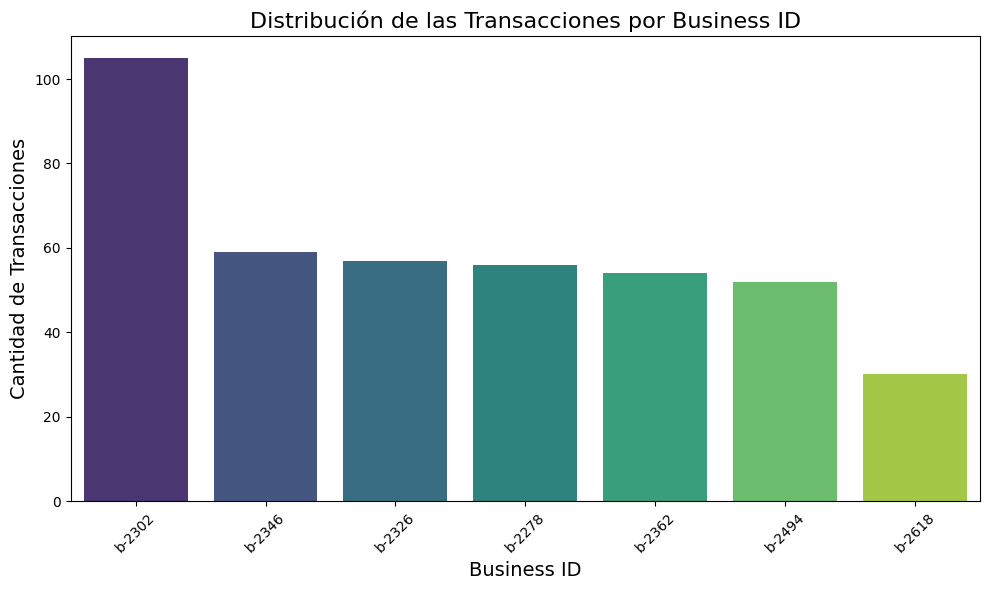

In [16]:
# Crear un barplot usando seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_business_count, x='business_id', y='count', palette='viridis')

# Añadir títulos y etiquetas
plt.title('Distribución de las Transacciones por Business ID', fontsize=16)
plt.xlabel('Business ID', fontsize=14)
plt.ylabel('Cantidad de Transacciones', fontsize=14)
plt.xticks(rotation=45)  # Rotar etiquetas en el eje x si son largas

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el layout para que no se corten las etiquetas
plt.show()

## Exercici 4, Una variable categòrica i una numèrica.

In [17]:
#filtraremos solo para transacciones con amount mayor a 200
df_transactions_filtro_amount_200 = df_transactions[df_transactions["amount"]>200].sort_values(by='amount', ascending=False)
df_transactions_filtro_amount_200

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,product_count
200,263035AA-8758-E413-8CC4-6D8F81BBF899,CcU-4338,b-2302,2021-06-21 11:23:01,499.23,0,"53, 31, 83, 29",223,36.6100421632,83.19525888,4
201,1753A288-9FC1-52E6-5C39-A1FFB97B0D3A,CcU-4345,b-2302,2021-08-17 05:32:08,497.84,0,"1, 13, 89, 31",222,57.9421920256,-114.72918272,4
377,360C7814-F7AF-B43A-0946-AB38D2683C86,CcU-2994,b-2326,2021-08-21 10:19:58,494.82,0,"7, 19, 79",116,-7.9300544512,-79.0733114368,3
268,17B43AB2-DD7D-96C4-2C7D-1989F119A1CB,CcU-4814,b-2278,2021-08-28 20:01:52,494.17,0,"29, 11",199,5.4180440064,-6.7093221376,2
104,5E6EC264-1D42-EE1D-870A-497C85828A6A,CcU-3666,b-2618,2022-01-31 12:01:11,492.42,0,"5, 29",267,66.9036684288,33.444680192,2
...,...,...,...,...,...,...,...,...,...,...,...
218,E69C6E04-0063-3E7C-0676-D1AFC1536B5C,CcU-4464,b-2302,2021-05-29 18:27:44,203.60,0,"29, 3, 71",214,-47.0837728256,-105.7000973312,3
20,632BBEE9-4725-E15C-7FC4-5B5D7EC5BD29,CcU-3078,b-2302,2021-08-27 22:13:25,203.23,0,"89, 3",275,45.8950729728,-58.7070354432,2
139,842B6344-B4A2-050D-AA31-9A80432A7E37,CcU-3911,b-2494,2022-01-19 05:25:54,202.94,0,"97, 29, 67",253,-29.4618476544,123.265885696,3
146,FD89D51B-AE8D-77DC-E450-B8083FBD3187,CcU-3960,b-2494,2022-03-16 02:35:05,200.72,0,"3, 2, 73, 1",250,8.012168192,-64.671543808,4


In [18]:
df_transactions_filtro_amount_200.columns

Index(['id', 'card_id', 'business_id', 'timestamp', 'amount', 'declined',
       'product_ids', 'user_id', 'lat', 'longitude', 'product_count'],
      dtype='object')

In [19]:
df_companies.columns

Index(['company_id', 'company_name', 'phone', 'email', 'country', 'website'], dtype='object')

In [20]:
#haremos un merge para poder mostrarlo todo en la misma gráfica
df_merge_company_amount = pd.merge (df_companies, df_transactions_filtro_amount_200, left_on='company_id',right_on='business_id', how='inner')

C:\Users\manu_\AppData\Local\Temp\ipykernel_18536\398225006.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df_merge_company_amount['company_name'], y=df_merge_company_amount["amount"], palette='viridis', errorbar=None)


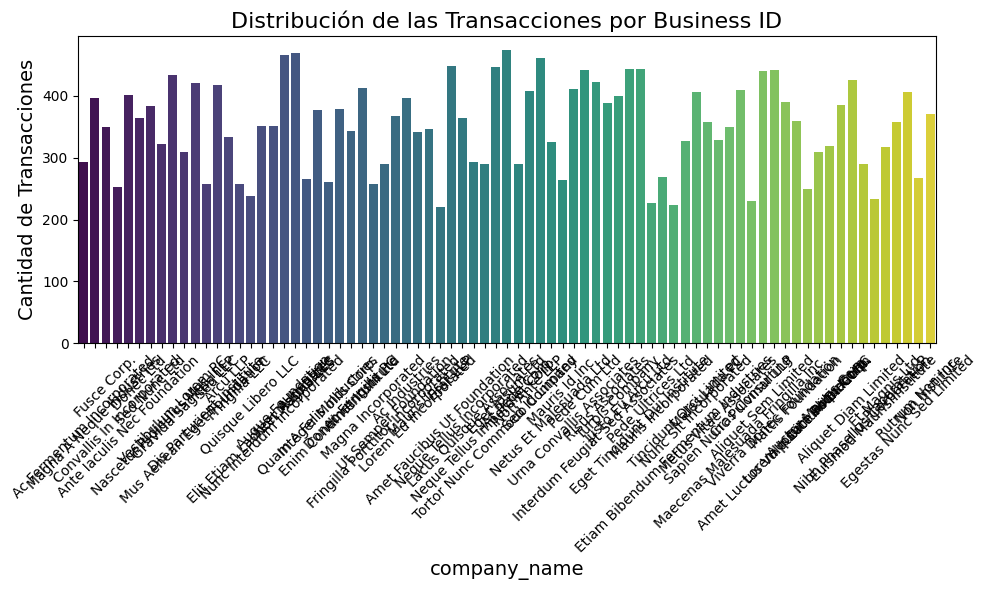

In [21]:
# Crear un barplot usando seaborn
plt.figure(figsize=(10, 6))
sns.barplot( x=df_merge_company_amount['company_name'], y=df_merge_company_amount["amount"], palette='viridis', errorbar=None)

# Añadir títulos y etiquetas
plt.title('Distribución de las Transacciones por Business ID', fontsize=16)
plt.xlabel('company_name', fontsize=14)
plt.ylabel('Cantidad de Transacciones', fontsize=14)
plt.xticks(rotation=45)  # Rotar etiquetas en el eje x si son largas

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el layout para que no se corten las etiquetas
plt.show()

INTERPRETACIÓN:

Vemos que hay una gran cantidad de compañias. El gráfico contiene un ffiltro por el cula solo mostramos las compañias que han recibido mas de 200 transacciones, para así ver las mas relevantes. 

Como vemos, existe un ambiente competitivo entre estas empresas, con algunas como Quisque Libero LLC y Amet Faucibus Ut Foundation a la cabeza. Las empresas que no han llegado a superar la barrera de las 300 transacciones podría utilizar estrategias de monitoreo y benchmarking, con especial atención a estsa última. Fomentar la realización de estudios profundizados sobre tus competidores para entender las estrategias y mejores prácticas utilizadas por ellos puede llevar a mejorar tu empresa, y en este caso, el número de transacciones.

## Exercici 5, Dues variables categòriques.


In [22]:
#realizando contaje de variable categorica company name
df_company_name = df_companies['company_name'].value_counts().reset_index()
df_company_name

,company_name,count
0,Ac Fermentum Incorporated,1
1,Magna A Neque Industries,1
2,Fusce Corp.,1
3,Convallis In Incorporated,1
4,Ante Iaculis Nec Foundation,1
...,...,...
95,Placerat LLP,1
96,Sed Est Corp.,1
97,Egestas Nunc Sed Limited,1
98,Rutrum Non Inc.,1


In [23]:
df_company_name_sorted = df_company_name.sort_values(by='company_name', ascending=False)

In [24]:
#realizando contaje de variable categorica country
df_country = df_companies['country'].value_counts().reset_index()
df_country

,country,count
0,Sweden,11
1,Netherlands,10
2,United States,9
3,United Kingdom,9
4,Italy,9
5,Germany,8
6,Belgium,8
7,Norway,7
8,Australia,6
9,New Zealand,6


In [25]:
#group by
df_companies.groupby('country')['company_name'].count()

country
Australia          6
Belgium            8
Canada             5
China              2
France             3
Germany            8
Ireland            6
Italy              9
Netherlands       10
New Zealand        6
Norway             7
Spain              1
Sweden            11
United Kingdom     9
United States      9
Name: company_name, dtype: int64

C:\Users\manu_\AppData\Local\Temp\ipykernel_18536\3616971166.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=company_by_country, x='country', y='company_name', palette='viridis')


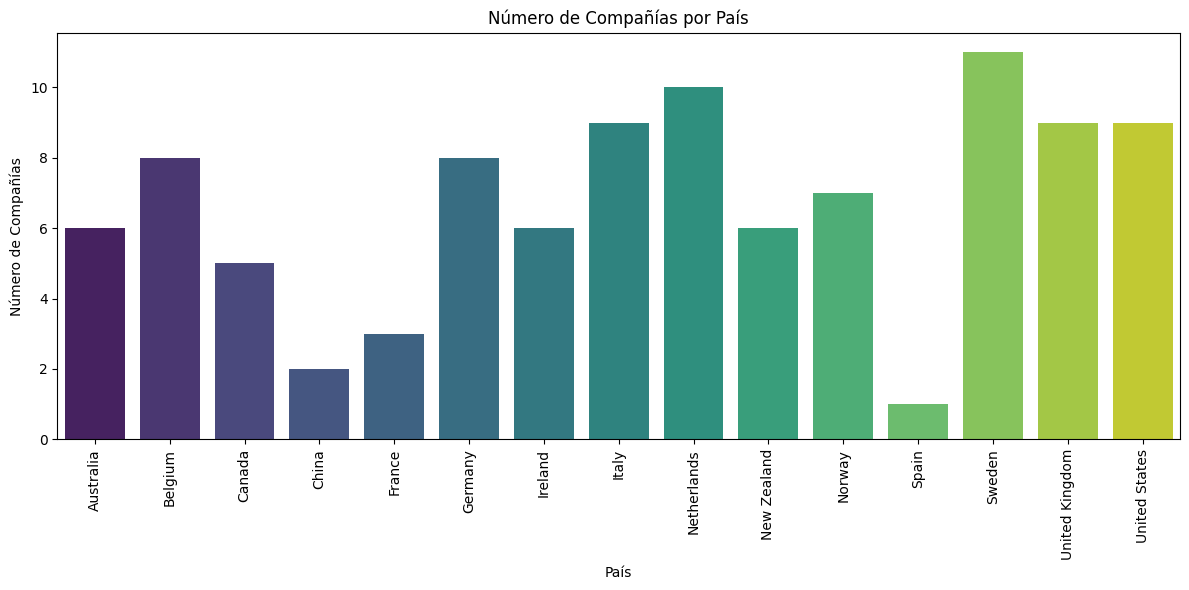

In [26]:
# Agrupación por 'country' y conteo de 'company_name'
company_by_country = df_companies.groupby('country')['company_name'].nunique().reset_index()

# Creación del gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
sns.barplot(data=company_by_country, x='country', y='company_name', palette='viridis')

plt.title('Número de Compañías por País')
plt.xlabel('País')
plt.ylabel('Número de Compañías')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

INTERPRETACION:

Aquí podemos ver un gráfico que nos muestra el numero de compañías por país. Suiza está a la cabeza, seguida de Países Bajos, y Italia, Reino Unido y Estados Unidos empatados en el tercer puesto.

Quizas la clave para entender los valores de esta gráfica reside en entender la historia de mercado de estas compañias. Los países simplemente representan el origen de las mismas. Pero el esfuerzo de creacion y espansión de cada compañia no concierne al país de por sí. Es quizás en países como China y España donde existen más oportunidades de mercado. Esto se debe a que cuantas menos compaías haya, menos competición y mas posibilidades de crear un negocio en alza dado a la mayor dispoibilidad de zonas libres de competencia en ese mismo país. Si el mercado favorece la creación de estas nuevas empresas en estos países con pocas compañias, es probable que veamos el numero de empresas subir en estos países en los proximos años.

## Excercici 6, Graficar 3 variables

In [27]:
df_merge_company_transactions.columns

NameError: name 'df_merge_company_transactions' is not defined

In [ ]:
#uniendo data frames para poder hacer grafica con 3 variables
df_merge_company_transactions = pd.merge (df_companies, df_transactions, left_on='company_id',right_on='business_id', how='inner') 

In [ ]:
df_merge_company_transactions.groupby(['country', 'declined'])['company_name'].count().reset_index() #haciendo group by para las tres variables 

,country,declined,company_name
0,Australia,0,6
1,Australia,1,6
2,Belgium,0,8
3,Belgium,1,5
4,Canada,0,57
5,Canada,1,4
6,China,0,2
7,China,1,1
8,France,0,3
9,France,1,3


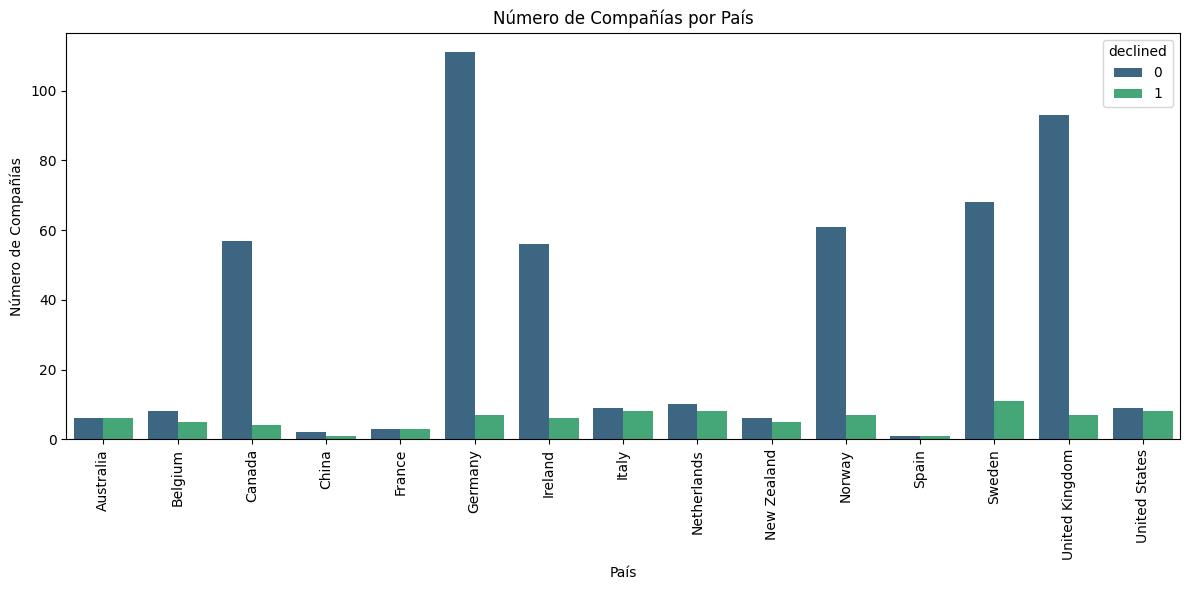

In [ ]:
# Agrupación por 'country' y conteo de 'company_name'
company_by_country = df_merge_company_transactions.groupby(['country', 'declined'])['company_name'].count().reset_index()

# Creación del gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
sns.barplot(data=company_by_country, x='country', y='company_name',hue='declined', palette='viridis') #hue es un color que me va a servir de 3era varable

plt.title('Número de Compañías por País')
plt.xlabel('País')
plt.ylabel('Número de Compañías')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


INTERPRETACION:

En este gráfico podemos observar la cantidad de compañias con transacionnes aceptadas (0) o declinadas (1) por pais. El hecho de que un pais tenga el mismo numero de compañias con transacciones declinadas que aceptadas suele ir a la par (en la gran mayoría de los paises) con pocas transacciones ( Australia, francia, españa...). Podríamos considerar que hay un mercado mediocre en estos paises ya que el dinero que entra se va. Los países que si tienen un volumen de transacciones aceptadas alto (Alemania, Irlanda, Noruega, Reino unido...) poseen un porcentaje contiguo de transacciones declinadas que son naturales en cualquier tipo de negocio de ventas (cultura del primero pruebo, luego compro).  El unico caso de un porcentaje de compañias con transacciones declinadas a vigilar es el de suecia, la cual deberia de comprobar el estado de satisfaccion de sus clientes para asegurar un ratio mas bajo de devoluciones en el futuro.

## Exercici 7, Graficar un Pairplot

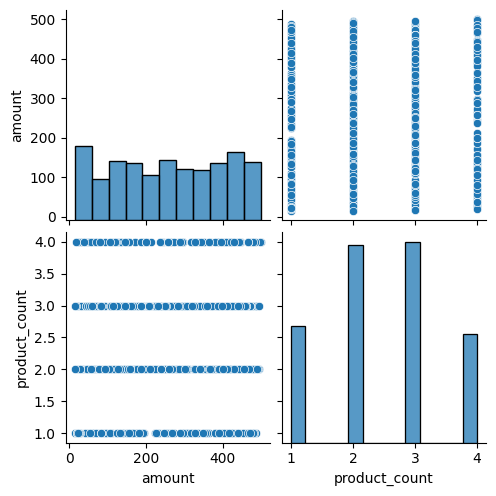

In [ ]:
#ejecucion del pairplot en df_transactions
sns.pairplot(df_transactions, diag_kind='hist')
plt.show()

INTERPRETACION:

En este pairplot podemos ver tanto la distribucion de contaje de los valores de amount (top left) como la distribucion de sus data points (bottom left, valores de 0 a 500 aprox en cada uno de los product counts (1,2,3,4)), pasando por la frecuencia de transacciones con 1, 2 3 y 4 productos vendidos (bottom right) y la distribucion de sus data points (top right). Los datos nos dan conlcusiones como que la cantidad gastada de media sige una distribucion ligeramente al alza una vez superamos el primer rango 0-50 (grafica amount, top left), pero que si nos fijamos en la grafica de product count (bottom right), se podrian aumentar el numero de productos vendidos por transaccion de 2,3 a 3,4 para aumentar ventas totales.

In [ ]:
#cerramos cursor

conn.close ()